In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
from zipfile import ZipFile
with ZipFile('C:/Users/Priyanka/Downloads/animals_exp.zip', 'r') as zObject:
  zObject.extractall(path='C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp')

In [22]:
import pathlib
data_dir = pathlib.Path('C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp')
data_dir

WindowsPath('C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp')

In [27]:
animals_images_dict = {
    'Angry': list(data_dir.glob('Angry/*')),
    'Sad': list(data_dir.glob('Sad/*')),
    'happy': list(data_dir.glob('happy/*')),
    'Other': list(data_dir.glob('Other/*'))
}

In [28]:
animals_images_dict.keys()

dict_keys(['Angry', 'Sad', 'happy', 'Other'])

In [29]:
exp_dict= {
    "Angry": 0,
    "Sad": 1,
    "happy" : 2,
    "Other": 3
}

In [30]:
Angry = list(data_dir.glob('Angry/*'))

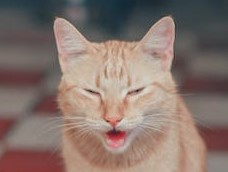

In [31]:
PIL.Image.open(str(Angry[1]))


In [32]:
str(animals_images_dict['Angry'][0])

'C:\\Users\\Priyanka\\AppData\\Local\\Programs\\Python\\Python311\\programs\\deep learning\\animals_exp\\Angry\\08Ycm8GawWQ.jpg'

In [33]:
img = cv2.imread(str(animals_images_dict['Angry'][0]))

In [34]:
cv2.resize(img,(200,200)).shape

(200, 200, 3)

In [35]:
X, y = [], []

for exp_name, images in animals_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,150))
        X.append(resized_img)
        y.append(exp_dict[exp_name])

In [45]:
X = np.array(X)
y = np.array(y)

In [46]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.3,random_state=0)

In [48]:
X_train.shape , X_test.shape

((259, 150, 200, 3), (111, 150, 200, 3))

In [49]:
# Scale the input arrays for machine learning
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [52]:
X_test_scaled[0]

array([[[0.72156863, 0.77254902, 0.83529412],
        [0.72941176, 0.78039216, 0.84313725],
        [0.7372549 , 0.78823529, 0.85098039],
        ...,
        [0.70980392, 0.74901961, 0.79215686],
        [0.70196078, 0.7372549 , 0.78823529],
        [0.68627451, 0.72156863, 0.77254902]],

       [[0.73333333, 0.78431373, 0.84705882],
        [0.73333333, 0.78431373, 0.84705882],
        [0.74117647, 0.78823529, 0.85098039],
        ...,
        [0.72156863, 0.75686275, 0.80392157],
        [0.70980392, 0.74509804, 0.79607843],
        [0.69803922, 0.73333333, 0.78431373]],

       [[0.73333333, 0.78431373, 0.84705882],
        [0.7372549 , 0.78431373, 0.84705882],
        [0.74509804, 0.78431373, 0.85098039],
        ...,
        [0.72156863, 0.75686275, 0.80784314],
        [0.71372549, 0.74901961, 0.8       ],
        [0.70196078, 0.7372549 , 0.78823529]],

       ...,

       [[0.71764706, 0.77254902, 0.85098039],
        [0.72941176, 0.78431373, 0.8627451 ],
        [0.74509804, 0

In [53]:
y_train[0]

3

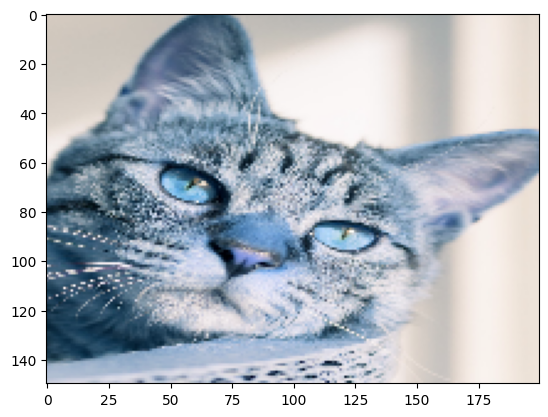

In [54]:
plt.imshow(X_train[0])

In [55]:
model = Sequential([
  layers.Conv2D(50, 3, padding='same', activation='relu',input_shape=(150,200,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(100, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(100, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(100, activation='relu'),
  layers.Dense(4,activation ='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 22s 2s/step - loss: 1.4971 - accuracy: 0.2548
Epoch 2/10
9/9 [==============================] - 19s 2s/step - loss: 1.3851 - accuracy: 0.2857
Epoch 3/10
9/9 [==============================] - 20s 2s/step - loss: 1.3734 - accuracy: 0.2857
Epoch 4/10
9/9 [==============================] - 23s 3s/step - loss: 1.3767 - accuracy: 0.2973
Epoch 5/10
9/9 [==============================] - 22s 2s/step - loss: 1.3470 - accuracy: 0.3320
Epoch 6/10
9/9 [==============================] - 21s 2s/step - loss: 1.3493 - accuracy: 0.3166
Epoch 7/10
9/9 [==============================] - 25s 3s/step - loss: 1.3000 - accuracy: 0.3243
Epoch 8/10
9/9 [==============================] - 22s 2s/step - loss: 1.1492 - accuracy: 0.4903
Epoch 9/10
9/9 [==============================] - 22s 2s/step - loss: 1.1126 - accuracy: 0.5405
Epoch 10/10
9/9 [==============================] - 21s 2s/step - loss: 0.9363 - accuracy: 0.6216


In [56]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 3s 560ms/step - loss: 1.5833 - accuracy: 0.2973


[1.5833479166030884, 0.29729729890823364]

In [57]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 2s 503ms/step


In [59]:
score = [np.argmax(element) for element in y_pred]

In [62]:
score[0:5] , y_test[0:5]

([0, 3, 0, 0, 0], array([1, 1, 3, 0, 2]))

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,score))

              precision    recall  f1-score   support

           0       0.33      0.61      0.43        31
           1       0.26      0.17      0.21        29
           2       0.33      0.24      0.28        38
           3       0.00      0.00      0.00        13

    accuracy                           0.30       111
   macro avg       0.23      0.26      0.23       111
weighted avg       0.28      0.30      0.27       111



In [ ]:
#There is an imbalance in the classes . So we need to handle the imbalance. There are various methods such as oversampling the minority class, undersampling the majority class, ensemble, SMOTE etc.

In [65]:
list(data_dir.glob('*/test/Angry/*'))

[WindowsPath('C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp/Train Test Valid Balaced Data/test/Angry/01.jpg'),
 WindowsPath('C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp/Train Test Valid Balaced Data/test/Angry/11.jpg'),
 WindowsPath('C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp/Train Test Valid Balaced Data/test/Angry/14.jpg'),
 WindowsPath('C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp/Train Test Valid Balaced Data/test/Angry/33.jpg'),
 WindowsPath('C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp/Train Test Valid Balaced Data/test/Angry/39.jpg'),
 WindowsPath('C:/Users/Priyanka/AppData/Local/Programs/Python/Python311/programs/deep learning/animals_exp/Train Test Valid Balaced Data/test/Angry/43.jpg'),
 WindowsPath('C:/Users/Priyanka/AppData/Local/Progra

In [66]:
Test_dict = {
    "Angry": list(data_dir.glob('*/test/Angry/*')),
    "Other": list(data_dir.glob('*/test/Other/*')),
    "Sad": list(data_dir.glob('*/test/Sad/*')),
    "happy": list(data_dir.glob('*/test/happy/*'))
}

Train_dict = {
    "Angry": list(data_dir.glob('*/train/Angry/*')),
    "Other": list(data_dir.glob('*/train/Other/*')),
    "Sad": list(data_dir.glob('*/train/Sad/*')),
    "happy": list(data_dir.glob('*/train/happy/*'))
}

In [71]:
Train = list(data_dir.glob('*/train/*/*'))
Test = list(data_dir.glob('*/test/*/*'))

In [73]:
len(Train), len(Test)

(1000, 38)

In [74]:
X_train_bal, y_train_bal = [], []

for exp_name, images in Train_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X_train_bal.append(resized_img)
        y_train_bal.append(exp_dict[exp_name])

In [77]:
X_test_bal, y_test_bal = [], []

for exp_name, images in Test_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X_test_bal.append(resized_img)
        y_test_bal.append(exp_dict[exp_name])

In [78]:
type(X_test_bal)

list

In [89]:
# we need to convert the list into array
X_test_bal = np.array(X_test_bal)
X_train_bal = np.array(X_train_bal)
y_train_bal = np.array(y_train_bal)
y_test_bal = np.array(y_test_bal)

In [81]:
X_train_bal.shape

(1000, 200, 200, 3)

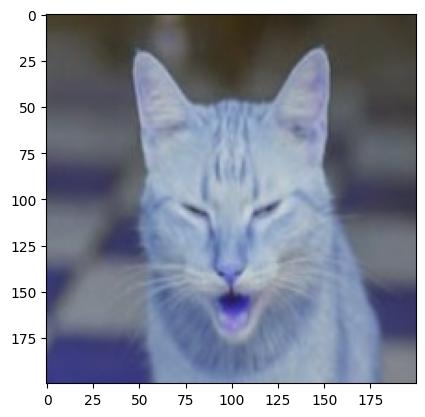

In [84]:
plt.imshow(X_train_bal[0])

In [82]:
type(y_train_bal)

list

In [85]:
X_test_bal_scl = X_test_bal/255
X_train_bal_scl = X_train_bal/255

In [91]:
y_train_bal.shape , y_test_bal.shape

((1000,), (38,))

In [92]:
model_bal = Sequential([
  layers.Conv2D(50, 3, padding='same', activation='relu',input_shape=(200,200,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(100, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(100, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(100, activation='relu'),
  layers.Dense(4,activation ='softmax')
])

model_bal.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_bal.fit(X_train_bal_scl, y_train_bal, epochs=10)

Epoch 1/10
32/32 [==============================] - 124s 4s/step - loss: 1.5897 - accuracy: 0.2360
Epoch 2/10
32/32 [==============================] - 130s 4s/step - loss: 1.3841 - accuracy: 0.2710
Epoch 3/10
32/32 [==============================] - 227s 7s/step - loss: 1.3736 - accuracy: 0.2950
Epoch 4/10
32/32 [==============================] - 119s 4s/step - loss: 1.3376 - accuracy: 0.3400
Epoch 5/10
32/32 [==============================] - 115s 4s/step - loss: 1.2380 - accuracy: 0.4390
Epoch 6/10
32/32 [==============================] - 113s 4s/step - loss: 1.0343 - accuracy: 0.5620
Epoch 7/10
32/32 [==============================] - 116s 4s/step - loss: 0.7595 - accuracy: 0.6940
Epoch 8/10
32/32 [==============================] - 118s 4s/step - loss: 0.5401 - accuracy: 0.7950
Epoch 9/10
32/32 [==============================] - 123s 4s/step - loss: 0.3443 - accuracy: 0.8800
Epoch 10/10
32/32 [==============================] - 119s 4s/step - loss: 0.2200 - accuracy: 0.9260


In [94]:
model_bal.evaluate(X_test_bal_scl,y_test_bal)

2/2 [==============================] - 6s 184ms/step - loss: 4.8600 - accuracy: 0.3421


[4.859982490539551, 0.34210526943206787]

In [95]:
y_pred_bal = model_bal.predict(X_test_bal_scl)

2/2 [==============================] - 1s 178ms/step


In [96]:
score_bal = [np.argmax(element) for element in y_pred_bal]

In [118]:
def plot_image(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(labels[y[index]])

Text(0.5, 1.0, 'truth')

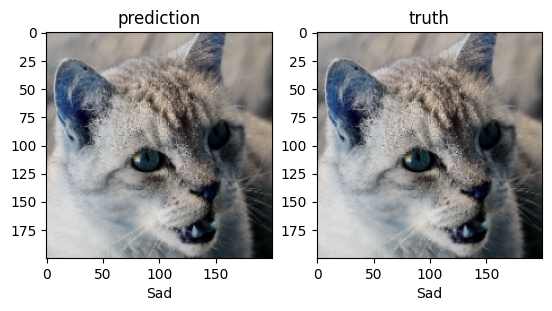

In [132]:
plt.subplot(1,2,1)
plot_image(X_test_bal_scl,score_bal,0)
plt.title("prediction")
plt.subplot(1,2,2)
plot_image(X_test_bal_scl,y_test,0)
plt.title("truth")

In [127]:
score_bal[2], y_test[2]

(0, 3)

In [114]:
labels = list(exp_dict.keys())
labels , type(labels)

(['Angry', 'Sad', 'happy', 'Other'], list)

In [97]:
print(classification_report(y_test_bal,score_bal))

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.12      0.09      0.11        11
           2       0.50      0.45      0.48        11
           3       0.25      0.33      0.29         6

    accuracy                           0.34        38
   macro avg       0.32      0.34      0.33        38
weighted avg       0.33      0.34      0.33        38



In [ ]:
# Above classification report shows that the scores have improved and also the accuracy has improved compared with the imbalanced data model.
# The F1 scores for the classes has improved. 